<a href="https://colab.research.google.com/github/akhilpatelgampala/CodeAlpha/blob/main/plot_cross_session_motor_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.9 MB/s eta 0:00:00



# Cross-Session Motor Imagery

This example show how to perform a cross session motor imagery analysis on the
very popular dataset 2a from the BCI competition IV.

We will compare two pipelines :

- CSP+LDA
- Riemannian Geometry+Logistic Regression

We will use the LeftRightImagery paradigm. This will restrict the analysis
to two classes (left hand versus right hand) and use AUC as metric.

The cross session evaluation context will evaluate performance using a leave
one session out cross-validation. For each session in the dataset, a model
is trained on every other session and performance are evaluated on the current
session.


In [3]:
pip install moabb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 14.7 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=05182f273852db9f5d4bf71d0ac81847f2e868f4ef7b87d6ab73624a8e1c5bb8
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
Successfully built pyriemann
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalli

In [5]:


import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import CSP
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

import moabb
from moabb.datasets import BNCI2014_001
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import LeftRightImagery


moabb.set_log_level("info")

## Create Pipelines

Pipelines must be a dict of sklearn pipeline transformer.

The CSP implementation is based on the MNE implementation. We selected 8 CSP
components, as usually done in the literature.

The Riemannian geometry pipeline consists in covariance estimation, tangent
space mapping and finally a logistic regression for the classification.



In [6]:
pipelines = {}

pipelines["CSP+LDA"] = make_pipeline(CSP(n_components=8), LDA())

pipelines["CSP+RF"] = make_pipeline(CSP(n_components=8),RandomForestClassifier())

pipelines["RG+LR"] = make_pipeline(
    Covariances(), TangentSpace(), LogisticRegression(solver="lbfgs")
)

In [8]:
pip install mne

In [11]:
mkdir /root/mne_data

## Evaluation

We define the paradigm (LeftRightImagery) and the dataset (BNCI2014_001).
The evaluation will return a DataFrame containing a single AUC score for
each subject / session of the dataset, and for each pipeline.

Results are saved into the database, so that if you add a new pipeline, it
will not run again the evaluation unless a parameter has changed. Results can
be overwritten if necessary.



In [12]:
paradigm = LeftRightImagery()
# Because this is being auto-generated we only use 2 subjects
dataset = BNCI2014_001()
dataset.subject_list = dataset.subject_list[:2]
datasets = [dataset]
overwrite = False  # set to True if we want to overwrite cached results
evaluation = CrossSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)

results = evaluation.process(pipelines)

print(results.head())

BNCI2014-001-CrossSession:   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:55: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))


MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(

  0%|                                              | 0.00/42.8M [00:00<?, ?B/s]
  0%|                                     | 8.19k/42.8M [00:00<09:24, 75.9kB/s]
  0%|                                      | 32.8k/42.8M [00:00<04:33, 156kB/s]
  0%|                                      | 88.1k/42.8M [00:00<02:21, 301kB/s]
  0%|▏                                      | 201k/42.8M [00:00<01:15, 562kB/s]
  1%|▍                                     | 424k/42.8M [00:00<00:40, 1.05MB/s]
  2%|▊                                     | 881k/42.8M [00:00<00:20, 2.01MB/s]
  4%|█▌                                   | 1.78M/42.8M [00:00<00:10, 3.84MB/s]
  8%|███                                  | 3.58

      score      time  samples subject session  channels  n_sessions  \
0  0.943287  0.773068    144.0       1  0train        22           2   
1  0.938368  0.714959    144.0       1   1test        22           2   
2  0.532697  0.795927    144.0       2  0train        22           2   
3  0.582851  1.023921    144.0       2   1test        22           2   
4  0.950424  0.327822    144.0       1  0train        22           2   

        dataset pipeline  
0  BNCI2014-001   CSP+RF  
1  BNCI2014-001   CSP+RF  
2  BNCI2014-001   CSP+RF  
3  BNCI2014-001   CSP+RF  
4  BNCI2014-001    RG+LR  


## Plot Results

Here we plot the results. We first make a pointplot with the average
performance of each pipeline across session and subjects.
The second plot is a paired scatter plot. Each point representing the score
of a single session. An algorithm will outperform another is most of the
points are in its quadrant.



<ipython-input-13-310a2a4a10bb>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


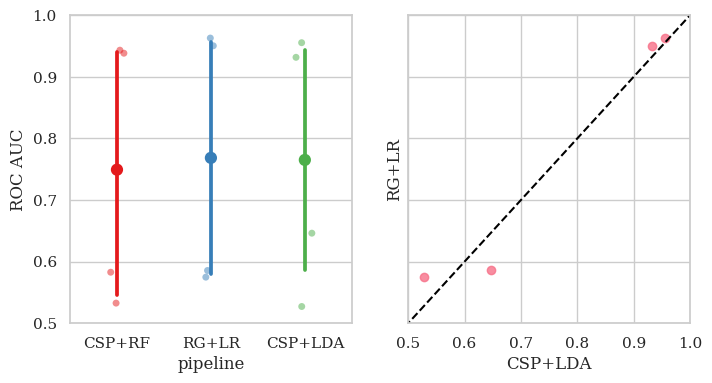

In [13]:
fig, axes = plt.subplots(1, 2, figsize=[8, 4], sharey=True)

sns.stripplot(
    data=results,
    y="score",
    x="pipeline",
    ax=axes[0],
    jitter=True,
    alpha=0.5,
    zorder=1,
    palette="Set1",
)
sns.pointplot(data=results, y="score", x="pipeline", ax=axes[0], palette="Set1")

axes[0].set_ylabel("ROC AUC")
axes[0].set_ylim(0.5, 1)

paired = results.pivot_table(
    values="score", columns="pipeline", index=["subject", "session"]
)
paired = paired.reset_index()

sns.regplot(data=paired, y="RG+LR", x="CSP+LDA", ax=axes[1], fit_reg=False)
axes[1].plot([0, 1], [0, 1], ls="--", c="k")
axes[1].set_xlim(0.5, 1)

plt.show()

In [18]:
dataset = BNCI2014_001()
dataset.subject_list = [1, 2, 3]

In [19]:
sessions = dataset.get_data(subjects=[1])

In [20]:
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

In [21]:
print(dataset.paradigm)

imagery


In [22]:
paradigm = LeftRightImagery()

In [23]:
X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[1])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True 

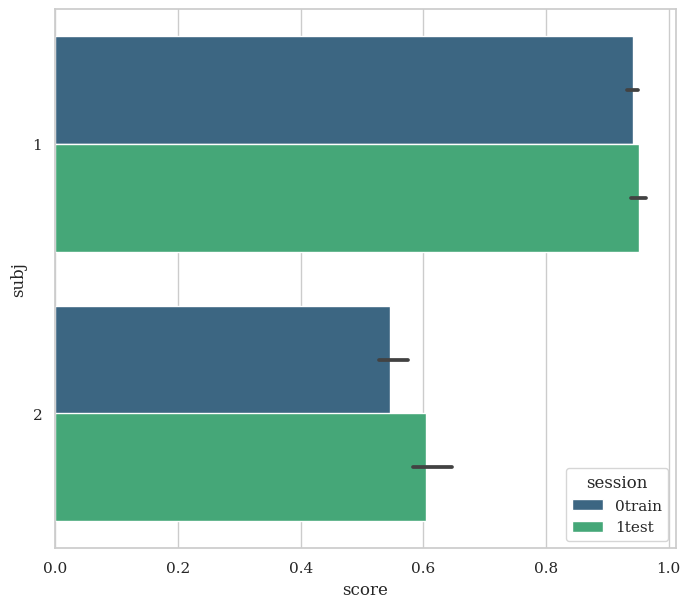

In [24]:
fig, ax = plt.subplots(figsize=(8, 7))
results["subj"] = results["subject"].apply(str)
sns.barplot(
    x="score", y="subj", hue="session", data=results, orient="h", palette="viridis", ax=ax
)
plt.show()